In [2]:
xy = pd.read_csv('y_clean.csv').drop(columns=['text'])\
    .assign(cat=lambda d: d['cat'].str.strip())\
    .pipe(lambda d: pd.get_dummies(d, prefix='cat', columns=['cat'], drop_first=True))\
    .rename(columns={'label': 'y'})\
    .assign(y = lambda d: (~d['y'].astype(bool)).astype(int))
print(xy.shape)
xy.iloc[:3,:3]

FileNotFoundError: [Errno 2] No such file or directory: 'y_clean.csv'

In [1]:
import pandas as pd

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
first_10_predictors = xy.columns
phi_coefficients = {}
for predictor in first_10_predictors:
    contingency_table = pd.crosstab(xy['y'], xy[predictor])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi = (chi2 / n) ** 0.5
    phi_coefficients[predictor] = phi
pd.Series(phi_coefficients).sort_values(ascending=False).round(2).head(20)

In [ ]:
!pip install -q mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(xy, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False).head(10)

/opt/conda/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


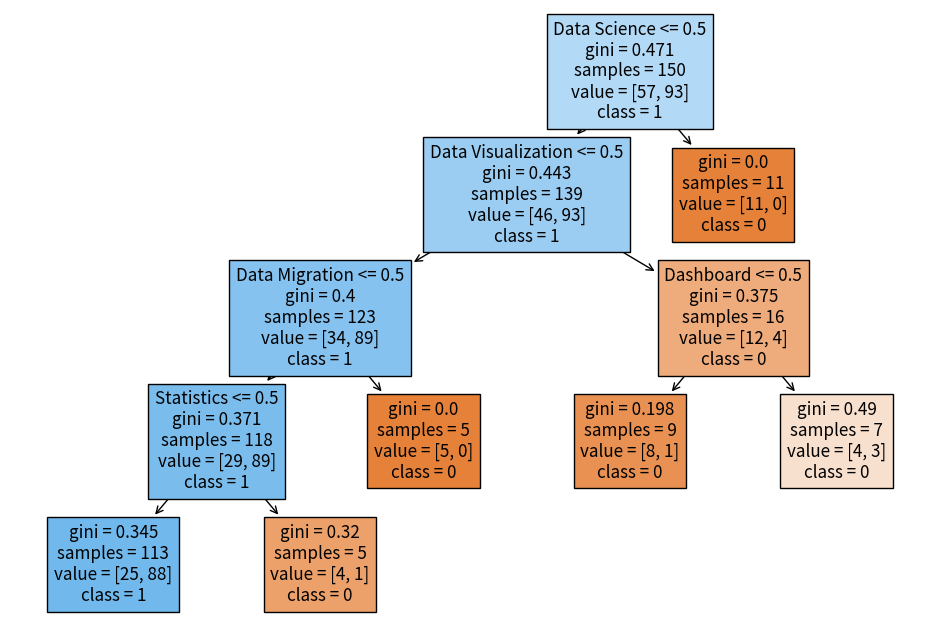

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
X = xy.drop(columns=['y', 'Data Analysis', 'cat_Data Visualization', 'Airtable', 'SQL', 'cat_Data Engineering'])
y = xy['y']
clf = DecisionTreeClassifier(max_depth=4, random_state=0, min_samples_leaf=5)
clf.fit(X, y)
r = export_text(clf, feature_names=list(X.columns))

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['0', '1'])
plt.show()

In [ ]:
from functools import reduce
nnot = ['Data Entry', 'Google Analytics', 'cat_Full Stack Development', 'Market Research', 'Automation']

xy2 = reduce(lambda d, c: d.loc[lambda dd: ~dd[c].astype(bool)], [xy] + nnot)
#     .assign(y = lambda d: (~d['y'].astype(bool)).astype(int))
print(xy.shape, xy2.shape)
xy2.agg(lambda x: np.round(xy2['y'].loc[x.astype(bool)].mean(), 2))\
    .to_frame('mn')\
    .assign(n = xy2.agg(sum))\
    .assign(i = lambda d: (np.sqrt(d['mn'] * d['n'])).round(1))\
    .sort_values('i', ascending=False)

(150, 122) (93, 122)
